In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
# Task 2
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
# Task 2
rm_null = df['total_bedrooms'].mean()

In [4]:
# Task 2
df['total_bedrooms'] = df['total_bedrooms'].fillna(rm_null)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
# Task 3
df['ocean_proximity'] = pd.Categorical(df['ocean_proximity'])
df['ocean_proximity'].cat.categories.tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [6]:
# Task 3
def char_to_int(x):
    if x == '<1H OCEAN':
        return 0
    elif x == 'INLAND':
        return 1
    elif x == 'ISLAND':
        return 2
    elif x == 'NEAR BAY':
        return 3
    else:
        return 4

df["ocean_condition"] = df["ocean_proximity"].apply(char_to_int)
df.drop("ocean_proximity", axis=1, inplace=True)
df["ocean_condition"]

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_condition, Length: 20640, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [7]:
# Task 3
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_condition
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


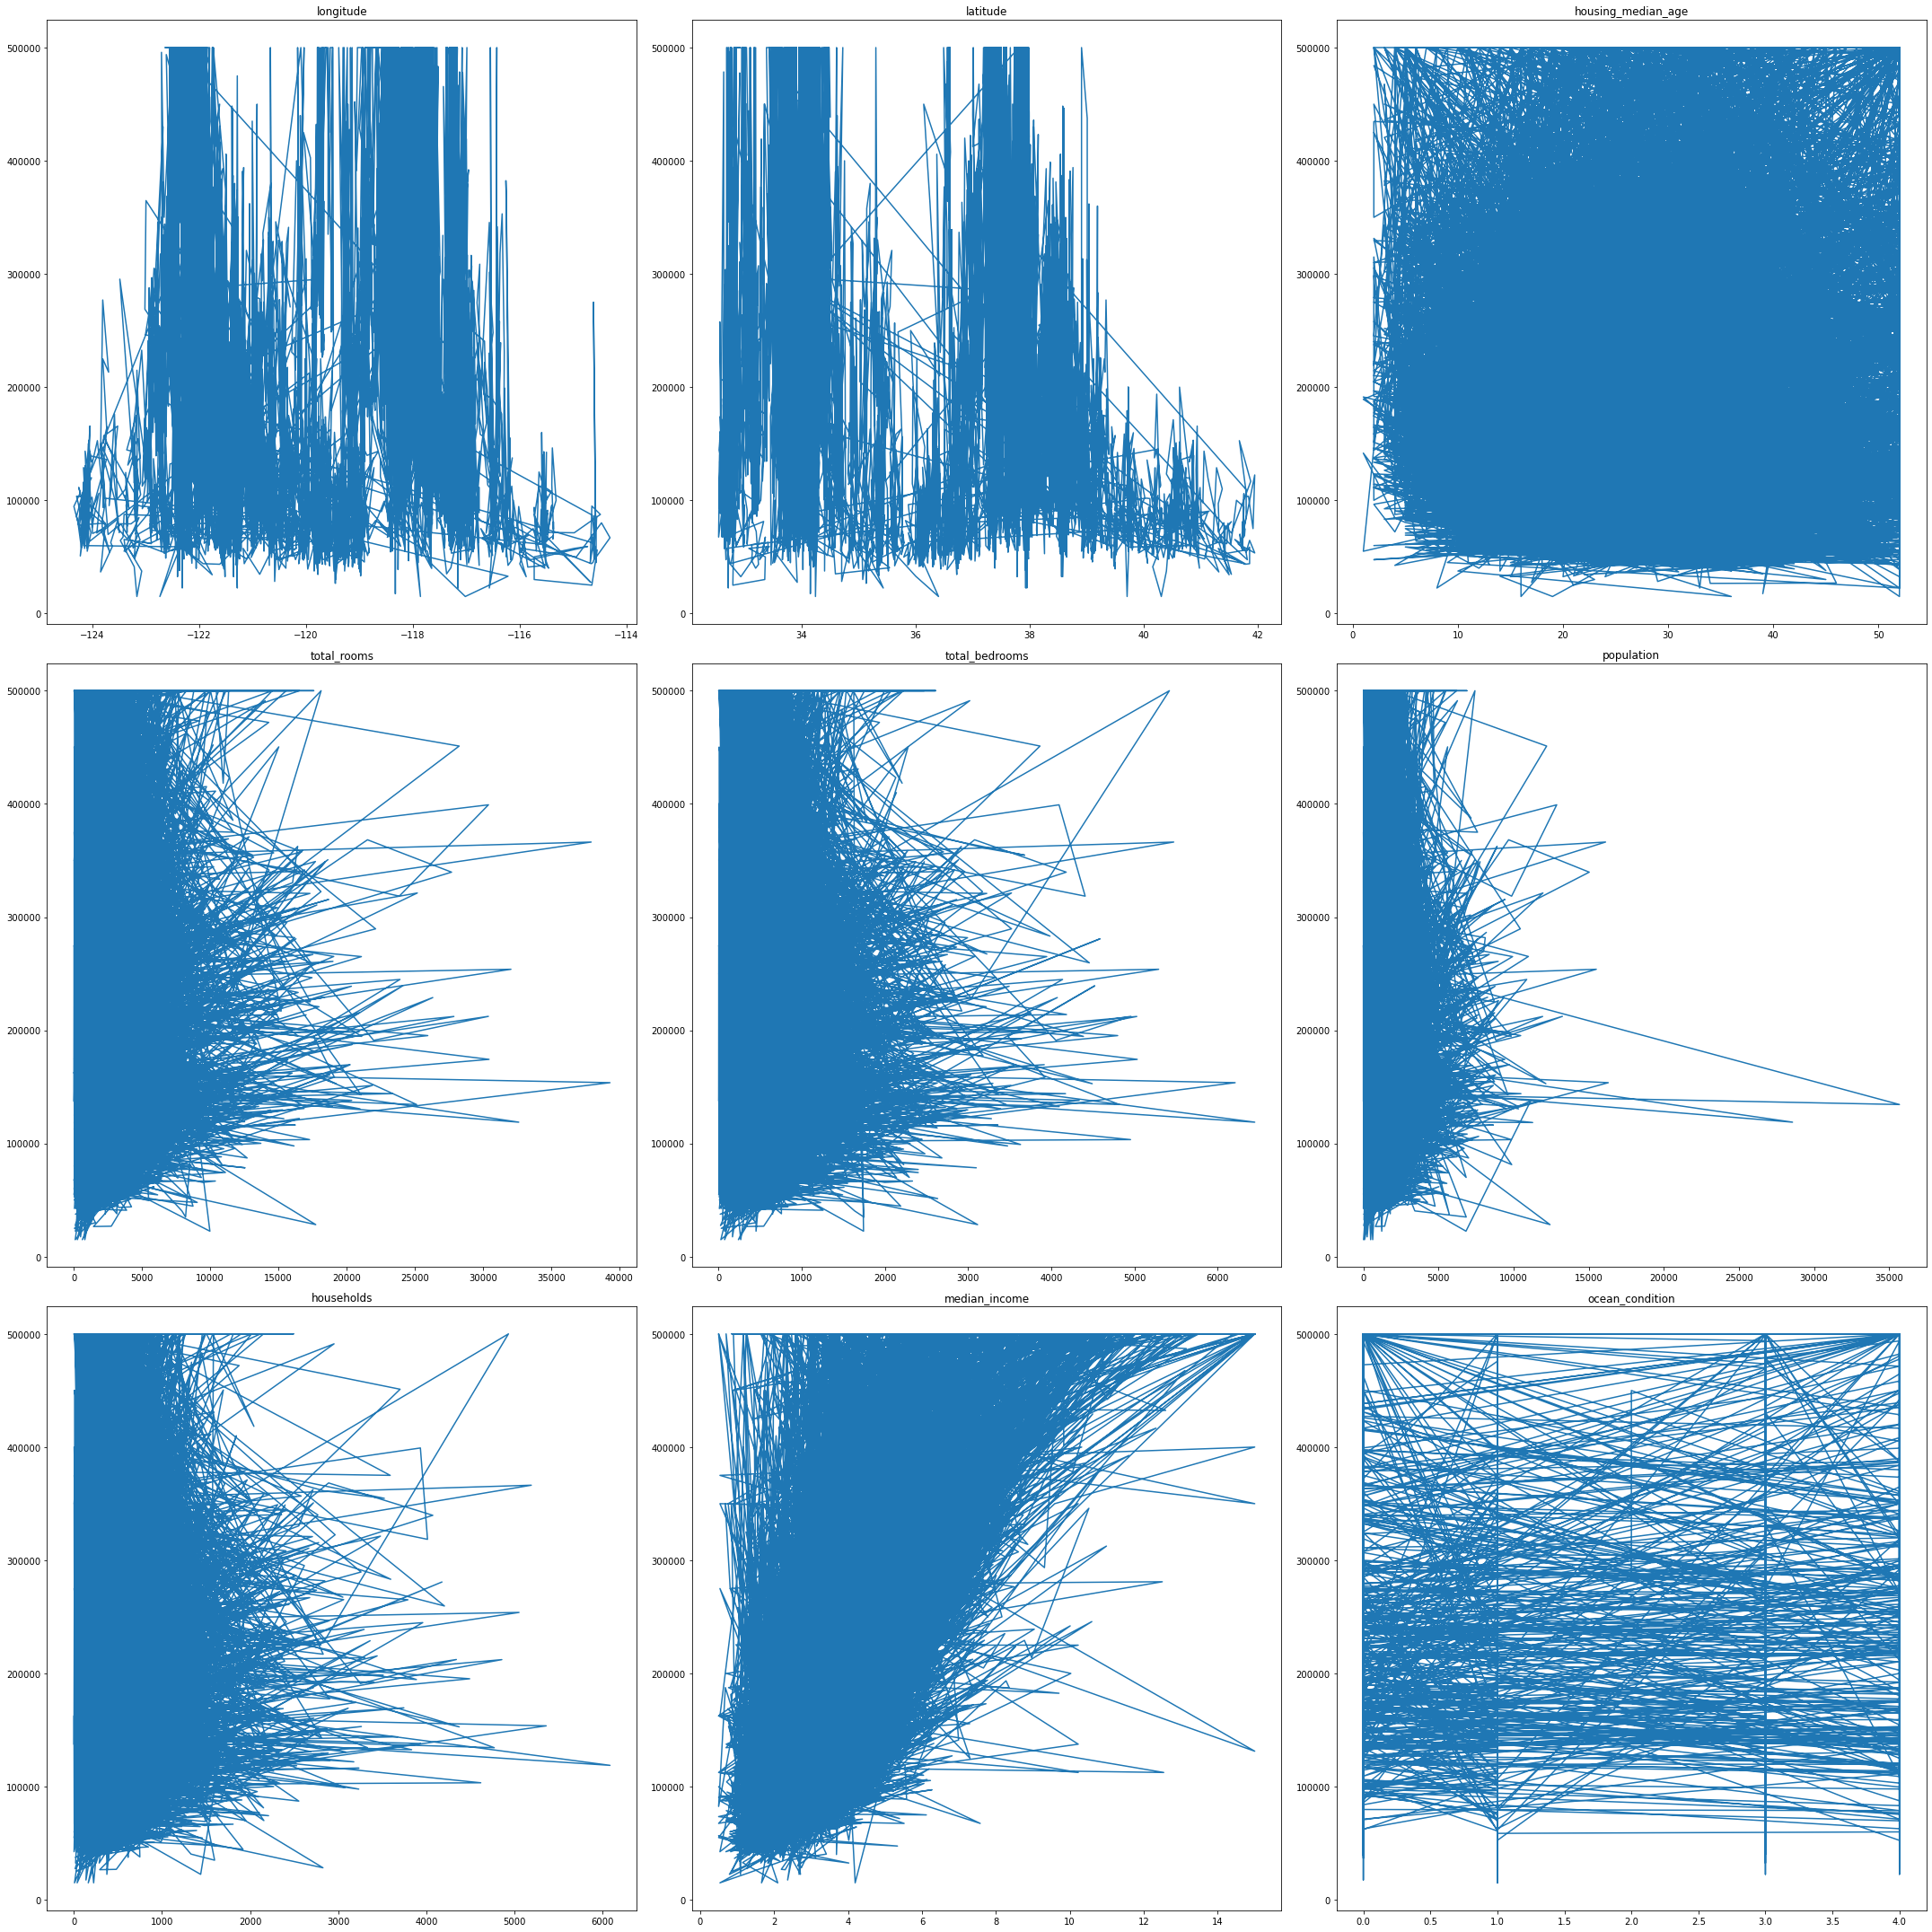

In [8]:
# Task 1
figure, axis = plt.subplots(3, 3, figsize=(30,30))

Y = df['median_house_value']

axis[0, 0].plot(df['longitude'], Y) 
axis[0, 0].set_title("longitude") 
  
axis[0, 1].plot(df['latitude'], Y) 
axis[0, 1].set_title("latitude") 
  
axis[0, 2].plot(df['housing_median_age'], Y) 
axis[0, 2].set_title("housing_median_age") 

axis[1, 0].plot(df['total_rooms'], Y) 
axis[1, 0].set_title("total_rooms") 

axis[1, 1].plot(df['total_bedrooms'], Y) 
axis[1, 1].set_title("total_bedrooms") 

axis[1, 2].plot(df['population'], Y) 
axis[1, 2].set_title("population") 
  
axis[2, 0].plot(df['households'], Y) 
axis[2, 0].set_title("households") 

axis[2, 1].plot(df['median_income'], Y) 
axis[2, 1].set_title("median_income") 

axis[2, 2].plot(df['ocean_condition'], Y) 
axis[2, 2].set_title("ocean_condition") 
  
figure.tight_layout()
plt.show() 

In [9]:
# Task 4
column_to_move = df.pop("median_house_value")
df.insert(9, "median_house_value", column_to_move )

x = df.iloc[:, :-1].values
print(x)

y = df.iloc[:, -1].values
print(y)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  1.2600e+02  8.3252e+00
   3.0000e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  1.1380e+03  8.3014e+00
   3.0000e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  1.7700e+02  7.2574e+00
   3.0000e+00]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  4.3300e+02  1.7000e+00
   1.0000e+00]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  3.4900e+02  1.8672e+00
   1.0000e+00]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  5.3000e+02  2.3886e+00
   1.0000e+00]]
[452600. 358500. 352100. ...  92300.  84700.  89400.]


In [10]:
# Task 4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [11]:
# Task 5
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)
predict

array([278779.09028801, 277664.03252104, 267153.05894305, ...,
       181574.14259931, 266283.93908029, 119540.63024601])

In [12]:
# Task 6
coeff = model.coef_
# print("coefficient of model is", coeff)
i = 0
for x in coeff:
    print("coefficient", i,"of model is", x)
    i += 1

coefficient 0 of model is -42903.6792985853
coefficient 1 of model is -42791.69978617312
coefficient 2 of model is 1160.981418881179
coefficient 3 of model is -6.922739869911311
coefficient 4 of model is 84.47518941048838
coefficient 5 of model is -35.263785800354526
coefficient 6 of model is 66.70379079420127
coefficient 7 of model is 39809.435186156654
coefficient 8 of model is 395.43931894582033


In [13]:
# Task 7
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print("R2 score is", r2)
print("mean squared error is", mse)
print("root mean squared error is", rmse)

R2 score is 0.6358657611751222
mean squared error is 4936354570.901405
root mean squared error is 70259.19563232563


Since R2 score is less than 80%, and mean squared error rate is too high, this model is not a good model.

In [14]:
# Task 8
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

feature_name = df.columns.values.tolist()
feature_name.pop(9)
print(feature_name)

def backward_elimination(X, y, significance_level):
    while True:
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            X = X.drop(feature_to_remove, axis=1)
        else:
            break
    return X.columns[1:]

X = pd.DataFrame(x_train, columns=feature_name)
y = pd.Series(y_train)

selected_variables = backward_elimination(X, y, 0.1)
selected_variables

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_condition']


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

ocean_condition is dropped

In [15]:
# Task 9
x_selected = df.iloc[:, :-2].values
print(x)

y = df.iloc[:, -1].values
print(y)

x_train_selected, x_test_selected, y_train_selected, y_test_selected \
= train_test_split(x_selected, y, test_size = 0.3, random_state = 10)

model_selected = LinearRegression()
model_selected.fit(x_train_selected,y_train_selected)
predict_selected = model_selected.predict(x_test_selected)
predict_selected

395.43931894582033
[452600. 358500. 352100. ...  92300.  84700.  89400.]


array([277685.73651054, 276886.88404206, 267492.02865491, ...,
       181583.79186923, 265037.91243741, 119646.20961643])

In [16]:
# Task 10
r2_selected = r2_score(y_test_selected, predict_selected)
mse_selected = mean_squared_error(y_test_selected, predict_selected)
rmse_selected = np.sqrt(mse_selected)

print("R2 score with selected features is", r2_selected)
print("mean squared error with selected features is", mse_selected)
print("root mean squared error with selected features is", rmse_selected)

R2 score with selected features is 0.6359502658619735
mean squared error with selected features is 4935208990.36345
root mean squared error with selected features is 70251.04262830161


R2 score with selected features is little greater than original model's R2 score. In addition, mean squared error rate of new model is slightly smaller than original model's.

In [17]:
# Task 11
data=[[122.25*-1, 37.85, 40, 880, 129, 322, 126, 8.3]]

#df_new_house=pd.DataFrame(data,columns=['longitude', 'latitude', 'housing median age', \
#'total rooms', 'total bedrooms', 'population', 'households', 'median income'])

model_selected.predict(data)

array([408351.2552891])